In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 9
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["figure.figsize"] = (8, 6)

import pint
from uncertainties import ufloat
ureg = pint.UnitRegistry()

In [2]:
rho = ufloat(1000, 1e-3) * ureg.kg / ureg.m ** 3
g = ufloat(9.81, 0.01) * ureg.m / ureg.s ** 2

In [3]:
def get_dP(N_data):
    std_N = np.hypot(np.std(N_data), 0.5)
    N = ufloat(np.mean(N_data), std_N)
    dP = 9.8067 * N * 0.2 * 0.991 * ureg.Pa
    return dP

1. Проверьте герметичность установки. Для этого заполните аспиратор водой. Чистую сухую иглу установите в сосуд со спиртом так, чтобы кончик иглы лишь касался поверхности спирта. Плотно закройте обе колбы В и Е пробками. Откройте кран К1 аспиратора и добейтесь пробулькивания пузырьков воздуха в колбе. Замерьте показания микроманометра. Закройте кран К1. Наблюдайте за показаниями манометра: при отсутствии течи в установке столбик спирта в манометре будет неподвижен. При наличии течи следует обратиться к преподавателю или лаборанту. 

2. Убедившись в герметичности системы, начните измерения. Откройте кран К1. Подберите частоту падения капель из аспиратора так, чтобы максимальное давление манометра не зависело от этой частоты (не чаще, чем 1 капля в 5 секунд). 

3. Измерьте максимальное давление $\Delta P_{спирт}$  при  пробулькивании пузырьков воздуха через спирт. По разбросу результатов оцените случайную погрешность измерения. Пользуясь табличным значением коэффициента поверхностного натяжения спирта, определите по формуле (1) диаметр иглы. Сравните полученный результат с диаметром иглы, измеренным по микроскопу. 

In [4]:
N_data = np.array([43, 43, 44, 43, 43])
dP = get_dP(N_data)
dP

83.967319008+/-1.2445675358619925 <Unit('pascal')>

In [5]:
sigma_theor = 22.75 * 1e-3 * ureg.J / ureg.m ** 2
d = 4 * sigma_theor / dP
d = d.to(ureg.mm)
d

1.083754978425951+/-0.016063467059716948 <Unit('millimeter')>

In [6]:
d_theor = ufloat(0.9 * 20 * 0.05, 0.05) * ureg.mm
d_theor

0.9+/-0.05 <Unit('millimeter')>

4. Перенесите предварительно промытую и просушенную от спирта иглу в колбу с дистиллированной водой. Измерьте максимальное давление $Р_1$ при пробулькивании пузырьков, когда игла лишь касается поверхности воды. Аспиратор должен быть предварительно  заполнен водой почти доверху. Отрегулируйте скорость поднятия уровня спирта в манометре и сохраняйте её в течение всех экспериментов. Измерьте расстояние между верхним концом иглы и любой неподвижной часть прибора $h_1$. 

In [7]:
N1_data = np.array([118, 118, 118, 119, 119])
P1 = get_dP(N1_data)
P1

230.13265209600002+/-1.360581558 <Unit('pascal')>

In [8]:
h1 = ufloat(2, 0.1) * ureg.cm
h1

2.0+/-0.1 <Unit('centimeter')>

In [9]:
print("Скорость поднятия", (119 - 105.5) / 16 * ureg.s ** -1)

Скорость поднятия 0.84375 / second


5. Утопите иглу до предела (между концом иглы и дном необходимо оставить небольшой зазор, чтобы образующийся пузырёк не касался дна). Измерьте $h_2$ (как в пункте 4). Измерьте максимальное давление в пузырьках $Р_2$. По разности давлений $\Delta Р = Р_2 - Р_1$ определите глубину погружения $\Delta h$ иглы и сравните с $\Delta h = h_1 - h_2$.

In [10]:
N2_data = np.array([201, 202, 202, 202, 202.5])
P2 = get_dP(N2_data)
P2

392.430595086+/-1.360581558 <Unit('pascal')>

In [11]:
h2 = ufloat(0.3, 0.1) * ureg.cm
h2

0.3+/-0.1 <Unit('centimeter')>

In [12]:
print(((P2 - P1) / (rho * g)).to(ureg.cm), "- Теоретически")
print(h1 - h2, "- Экспериментально")

1.654+/-0.020 centimeter - Теоретически
1.70+/-0.14 centimeter - Экспериментально


In [13]:
print((rho * g * (h1 - h2)).to(ureg.Pa), "- Теоретически")
print(P2 - P1, "- Экспериментально")

167+/-14 pascal - Теоретически
162.3+/-1.9 pascal - Экспериментально


6. Снимите температурную зависимость $\sigma(T)$ дистиллированной воды. Для этого включите термостат и подождите, пока нужная вам температура не стабилизируется. Следует заметить, что термометр показывает температуру воды в термостате. Время установления заданной температуры в колбе с исследуемой жидкостью довольно большое, поэтому после установления заданной температуры в термостате дождитесь прогрева исследуемой жидкости в колбе в течение нескольких минут (5-7 минут). После этого проведите измерение давления. Для уменьшения погрешности опыта замер давления  при фиксированной температуре следует проводить несколько раз. Проводить измерение температурной зависимости  рекомендуется в диапазоне  $20^{\circ}C - 60^{\circ}C$ через $5^{\circ}C$. Запрещается нагревать воду в термостате выше $60^{\circ}C$. 

In [14]:
df_experiment = pd.read_excel('main.xlsx')
df_experiment = df_experiment.drop(0)
df_experiment

,"$T$, $^\circ C$",$N_1$,$N_2$,$N_3$,$N_4$,$N_5$
1,25.1,204.0,204.0,204.0,203.5,204.0
2,30.3,202.5,202.0,202.5,202.5,202.5
3,35.2,200.5,201.0,200.5,200.5,201.0
4,40.2,198.5,199.0,199.0,199.0,199.5
5,45.2,198.0,198.0,198.0,198.0,198.0
6,50.2,196.5,197.5,196.5,197.0,197.0
7,55.2,194.5,195.0,195.0,195.0,195.0
8,60.1,193.0,193.0,192.5,193.0,193.0


7. Оцените погрешность измерения давления и температуры. Рассчитайте величину коэффициента поверхностного натяжения воды $\sigma(T)$, используя значение диаметра иглы, полученное при измерениях на спирте (или измеренное на микроскопе). 

In [15]:
df_processed = pd.DataFrame(columns=['$T$, $^\circ C$', '$\sigma$, $мН/м$', '$\sigma_{\sigma}$, $мН/м$'])
for i in range(len(df_experiment)):
    T_i = df_experiment.iloc[i,0]
    dP_i = get_dP(df_experiment.iloc[i, 1:6].to_numpy()) + (P1 - P2)
    sigma_i = (dP_i * d / 4).to(ureg.mN / ureg.m)
    df_processed.loc[i] = [T_i, sigma_i.m.n, sigma_i.m.s]
df_processed

,"$T$, $^\circ C$","$\sigma$, $мН/м$","$\sigma_{\sigma}$, $мН/м$"
0,25.1,63.405093,1.111494
1,30.3,62.615162,1.101612
2,35.2,61.719907,1.092997
3,40.2,60.824653,1.087029
4,45.2,60.298032,1.067655
5,50.2,59.718750,1.078628
6,55.2,58.665509,1.052764
7,60.1,57.612269,1.039907


8. Постройте график зависимости $\sigma(T)$ и определите по графику температурный коэффициент $\dfrac{d\sigma}{dT}$. Оцените точность результата. 

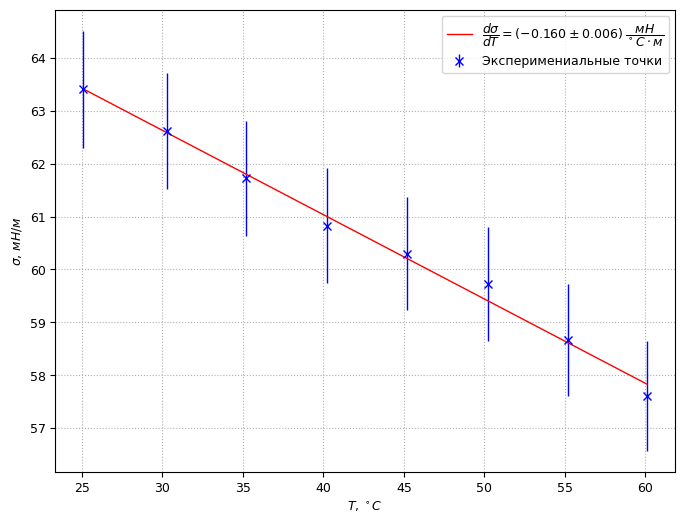

In [16]:
x_name = r"$T$, $^\circ C$"
y_name = r"$\sigma$, $мН/м$"
y_err_name = r"$\sigma_{\sigma}$, $мН/м$"

x_data = df_processed[x_name]
y_data = df_processed[y_name]
y_err = df_processed[y_err_name]

plt.xlabel(x_name)
plt.ylabel(y_name)

plt.errorbar(
    x_data,
    y_data,
    yerr=y_err,
    fmt="xb",
    label="Эксперимениальные точки"
)

func = lambda x, k, b: k * x + b
popt, pcov = curve_fit(func , xdata=x_data, ydata=y_data, sigma=y_err)
perr = np.sqrt(np.diag(pcov))
k = ufloat(popt[0], perr[0])
plt.plot(
    x_data,
    func(x_data, *popt),
    'r-',
    label=fr"$\dfrac{{d\sigma}}{{dT}}=({k:L})$ $\dfrac{{мН}}{{^\circ C \cdot м}}$"
)

plt.legend()
plt.savefig("8.png", dpi=200)

9. На другом графике постройте зависимость от температуры 

    a) теплоты образования единицы поверхности жидкости $q=-T \cdot \dfrac{d\sigma}{dT}$ и  

    b) поверхностной энергии $U$ единицы площади $F$: $\dfrac{U}{F}=(\sigma -T \cdot \dfrac{d\sigma}{dT})$.  

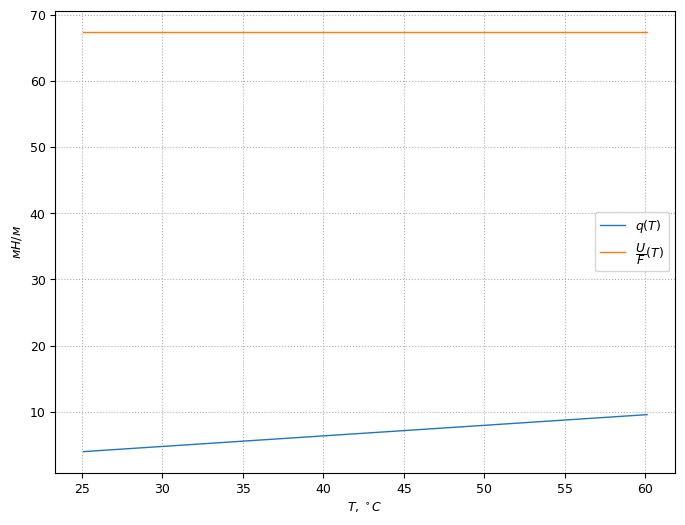

In [17]:
x_name = r"$T$, $^\circ C$"
y_name = r"$мН/м$"

x_data = df_processed[x_name]

plt.xlabel(x_name)
plt.ylabel(y_name)

plt.plot(
    x_data,
    -x_data * k.n,
    label="$q(T)$"
)

plt.plot(
    x_data,
    func(x_data, *popt) - x_data * k.n,
    label="$\dfrac{{U}}{{F}}(T)$"
)

plt.legend()
plt.savefig("9.png", dpi=200)